In [1]:
import pandas as pd
import numpy as np

#### Experimenting graph plotting with COVID-19 data from John Hopkins University.

In [202]:
# Get data from repo, squash table into country-only data. The raw table 
# offers subdivisions (province, state, county level data) for some countries.

# df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
# df = df.drop(columns=["Province/State", "Lat", "Long"])
# df = df.groupby("Country/Region").sum()
# df.head()

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum().sort_values(by=df.columns[-1], ascending=False)

##### Create plot for a given country. In this case we'll choose Italy.

21157


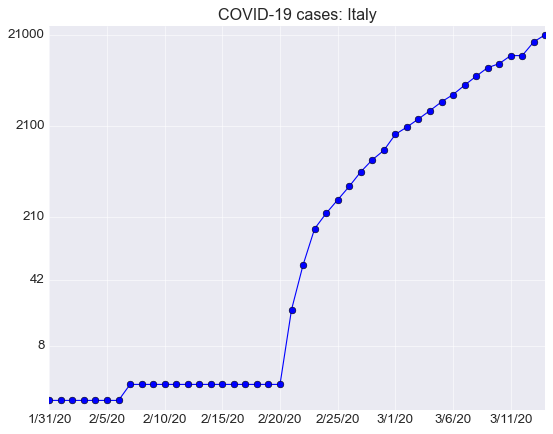

In [203]:
from matplotlib import pyplot as plt

country = "Italy"
ax = plt.gca()
ax.set_yscale("log") # Use logarithmic scale for clarity

plt.style.use('seaborn-darkgrid') # This is a nice theme to use.
a = df.loc[country, :].replace(0, np.nan).dropna()
mx = max(map(int,list(a)))
plt.yticks([mx, mx//10, mx//100, mx//500, mx//2500], [int(round(mx, len(str(mx))*-1+2)), int(round(mx//10,  len(str(mx//10))*-1+2)), int(round(mx//100, len(str(mx//100))*-1+2)), int(round(mx//500,  len(str(mx//500))*-1+2)), int(round(mx//2500,  len(str(mx//2500))*-1+2))])
# plt.ylim(top=1.2)

# plt.ylim(0.1, 82000.0)
fig.autofmt_xdate()
plt.margins(0.025)
plt.title(f"COVID-19 cases: {country}")
a.plot(marker='o')

plt.savefig("plot.png")
print(mx)
